In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import data, color
import skimage
from skimage.transform import rescale, resize, downscale_local_mean


In [2]:
# importing the libraries for xml file
import elementpath
import lxml.etree as etree
import lxml
import numpy as np

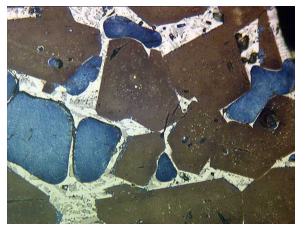

In [22]:
# uploading image and reading it
img = plt.imread('images/img 002.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()
height, width,_ = img.shape

In [23]:
# reading the annot
root = etree.parse('annotations.xml').getroot()


In [24]:
labels = {"Alite":0, "Belite":1, "Aluminate":2, "Ferrite":3, "Others":4}
#dictionary for label colors
colors = {"Alite":(102,102,255), "Belite":(192,192,192), "Aluminate":(64,64,64), "Ferrite":(0,0,0), "Others":(10,10,10)}
List = ["Alite", "Belite", "Aluminate", "Ferrite", "Others"]

In [25]:
# creating a list to convert the xml file into a list
anno = []
# giving image name
img_name= "img 002.jpg"
image_name_attr = ".//image[@name='{}']".format(img_name) # img_path  = "img 002.jpg"
for image_tag in root.iterfind(image_name_attr):
    image = {}
    for key, value in image_tag.items():
        print(key,value)
        image[key] = value
    image["shapes"] = []
    for polygon_tag in image_tag.iter("polygon"):
        polygon = {"type":"polygon"}
        polygon['label'] = polygon_tag.get('label')
        polygon["points"] = polygon_tag.get("points")
        image['shapes'].append(polygon)
    anno.append(image)
    
anno

id 0
name img 002.jpg
width 640
height 484


[{'id': '0',
  'name': 'img 002.jpg',
  'width': '640',
  'height': '484',
  'shapes': [{'type': 'polygon',
    'label': 'Alite',
    'points': '226.03,74.49;195.67,233.21;206.71,242.87;241.21,256.67;267.43,248.39;278.47,251.15;322.64,277.37;341.96,280.13;391.64,242.87;346.10,103.48;322.64,97.96;318.50,113.14;296.42,82.77;288.14,73.11;264.67,68.97;242.59,73.11'},
   {'type': 'polygon',
    'label': 'Alite',
    'points': '640.00,356.10;594.52,358.80;586.24,358.80;568.30,376.74;554.50,385.02;517.24,415.38;525.52,438.84;526.90,463.00;528.30,484.00;588.24,484.00;640.00,482.47'},
   {'type': 'polygon',
    'label': 'Alite',
    'points': '524.15,483.80;526.38,457.50;525.49,438.78;520.14,411.58;478.90,379.93;310.17,410.47;262.02,398.43;214.99,406.90;237.06,418.49;234.83,424.51;193.59,430.31;199.61,467.31;219.32,484.00;494.53,484.00'},
   {'type': 'polygon',
    'label': 'Alite',
    'points': '0.00,354.80;96.00,423.58;89.37,435.17;124.15,468.30;113.68,484.00;0.00,484.00;0.00,442.38'},
   {'

In [26]:
# To create a mask of xml file
scale_factor = 1
def create_mask_file(anno):
    height = int(anno[0]["height"])
    width = int(anno[0]["width"])
#defining background
    background = np.zeros((height, width, 3), np.uint8)
    mask = np.full((height, width, 3), background, dtype=np.uint8)
    shapes = anno[0]["shapes"]
    for shape in shapes:
        points = []
        points = [tuple(map(float, p.split(','))) for p in shape['points'].split(';')]
        points = np.array([(int(p[0]), int(p[1])) for p in points])
        points = points.astype(int)
        label_color = colors[shape["label"]]            
        mask = cv.drawContours(mask, [points], -1, color=(255, 255, 255), thickness=0)
        mask = cv.fillPoly(mask, [points], color=label_color)
    return mask

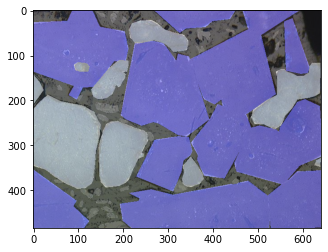

In [27]:
back_gr = create_mask_file(anno)
plt.imshow(img,alpha=0.8)
plt.imshow(back_gr,cmap='Reds',alpha=0.6)
plt.show()

In [28]:
# Now comes the training Part ... Are you ready?
img_tr = img.copy()

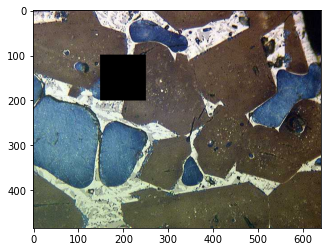

In [29]:
grid_size = 1
xline =[]
yline = []
for i in range (100,200):
    for j in range(150,250):
        pxu = i + grid_size + 1
        pxl = i - grid_size
        
        pyu = j + grid_size +1
        pyl = j - grid_size
        
        img_tr[pxl:pxu,pyl:pyu,0] = 0
        img_tr[pxl:pxu,pyl:pyu,1] = 0
        img_tr[pxl:pxu,pyl:pyu,2] = 0
plt.imshow(img_tr)

In [35]:
# Input
raw_pixel_range_lower,raw_pixel_range_higher = 150,200
column_pixel_range_lower,column_pixel_range_higher = 200,250

In [44]:
imgplay = img.copy()
imgdata=[]
ylabel=[]
numbands =3
#funtion for gettin image data
#original_image = img
#image_mask = back_gr
def data_out():
    for i in range(raw_pixel_range_lower,raw_pixel_range_higher):
        for j in range (column_pixel_range_lower,column_pixel_range_higher):
            pxp = i+grid_size+1
            pxm = i-grid_size

            pyp = j+grid_size+1
            pym = j-grid_size
#            print(image_mask[i,j])
            ylabel.append(list(colors.keys())[list(colors.values()).index(tuple(back_gr[i,j]))])
            
            data_input = [] #if numbands > 1 then uncomment it
            flat_2 = []
            for k in range(numbands):
                flat = imgplay[pxm:pxp,pym:pyp,k].flatten()
                flat_2.append(flat)
#                print(flat)
                imgdata.append(list(flat))
                data_input = np.hstack((data_input,flat))
                
#    return[imgdata]
#plt.imshow(imgplay)

In [90]:
imgplay = img.copy()
imgdata=[]
ylabel=[]
numbands =3
#funtion for gettin image data
#original_image = img
#image_mask = back_gr
def data_out():
    for i in range(raw_pixel_range_lower,raw_pixel_range_higher):
        for j in range (column_pixel_range_lower,column_pixel_range_higher):
            pxp = i+grid_size+1
            pxm = i-grid_size

            pyp = j+grid_size+1
            pym = j-grid_size
#            print(image_mask[i,j])
            ylabel.append(list(colors.keys())[list(colors.values()).index(tuple(back_gr[i,j]))])
            
            data_input = [] #if numbands > 1 then uncomment it
            flat_2 = []
            for k in range(numbands):
                flat = imgplay[pxm:pxp,pym:pyp,k].flatten()
#                print(flat)
#                flat_2.append(flat)
                flat_2 = flat_2 + list(flat)
            imgdata.append(flat_2)
                    
                
    return(imgdata)
#plt.imshow(imgplay)

In [91]:
data_out()

[[63,
  81,
  48,
  69,
  34,
  76,
  74,
  109,
  76,
  93,
  108,
  73,
  99,
  61,
  99,
  102,
  133,
  100,
  143,
  153,
  113,
  149,
  106,
  140,
  152,
  179,
  138],
 [81,
  48,
  47,
  34,
  76,
  32,
  109,
  76,
  41,
  108,
  73,
  70,
  61,
  99,
  53,
  133,
  100,
  60,
  153,
  113,
  101,
  106,
  140,
  84,
  179,
  138,
  92],
 [48,
  47,
  94,
  76,
  32,
  117,
  76,
  41,
  180,
  73,
  70,
  112,
  99,
  53,
  133,
  100,
  60,
  197,
  113,
  101,
  134,
  140,
  84,
  156,
  138,
  92,
  217],
 [47,
  94,
  212,
  32,
  117,
  244,
  41,
  180,
  227,
  70,
  112,
  228,
  53,
  133,
  255,
  60,
  197,
  239,
  101,
  134,
  241,
  84,
  156,
  255,
  92,
  217,
  251],
 [94,
  212,
  238,
  117,
  244,
  242,
  180,
  227,
  247,
  112,
  228,
  252,
  133,
  255,
  253,
  197,
  239,
  255,
  134,
  241,
  255,
  156,
  255,
  255,
  217,
  251,
  255],
 [212,
  238,
  222,
  244,
  242,
  202,
  227,
  247,
  251,
  228,
  252,
  232,
  255,
  253,
  211

In [99]:
import pandas as pd
x = pd.DataFrame(imgdata).fillna(0)
y = ylabel

In [100]:
x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,63,81,48,69,34,76,74,109,76,93,...,100,-113,-103,113,-107,106,-116,-104,-77,-118
1,81,48,47,34,76,32,109,76,41,108,...,60,-103,113,101,106,-116,84,-77,-118,92
2,48,47,94,76,32,117,76,41,-76,73,...,-59,113,101,-122,-116,84,-100,-118,92,-39
3,47,94,-44,32,117,-12,41,-76,-29,70,...,-17,101,-122,-15,84,-100,-1,92,-39,-5
4,94,-44,-18,117,-12,-14,-76,-29,-9,112,...,-1,-122,-15,-1,-100,-1,-1,-39,-5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,107,83,88,118,99,88,86,98,102,100,...,95,94,70,75,105,86,75,73,85,89
2496,83,88,-126,99,88,107,98,102,93,76,...,86,70,75,117,86,75,94,85,89,80
2497,88,-126,102,88,107,105,102,93,69,81,...,62,75,117,89,75,94,92,89,80,56
2498,-126,102,92,107,105,93,93,69,103,123,...,96,117,89,79,94,92,80,80,56,90


In [101]:
y

['Belite',
 'Belite',
 'Belite',
 'Belite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Belite',
 'Belite',
 'Belite',
 'Belite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Ferrite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Alite',
 'Al

In [102]:
from sklearn.neural_network import MLPClassifier

In [103]:
# model = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000,activation='relu',alpha=1e-2,learning_rate_init=1e-5).fit(x,y)
#99
model = MLPClassifier(hidden_layer_sizes=(10,2),alpha=0.01,max_iter=10000,random_state=1991).fit(x,y)#for small square in left
# model = MLPClassifier(hidden_layer_sizes=(10,),alpha=0.00001,validation_fraction=0.2,learning_rate='adaptive',
#                       activation='relu',max_iter=1000,random_state=2).fit(x,y)

# modelx = XGBClassifier(n_estimators=5).fit(x,y)
# ypred = model.predict(x)

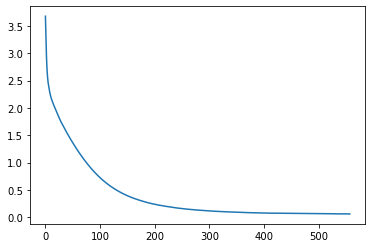

In [104]:
plt.plot(model.loss_curve_)

In [105]:
ypred = model.predict(x)
from sklearn.metrics import classification_report
print(classification_report(y,ypred))

              precision    recall  f1-score   support

       Alite       0.99      1.00      0.99      2179
      Belite       0.00      0.00      0.00        22
     Ferrite       0.97      0.97      0.97       299

    accuracy                           0.99      2500
   macro avg       0.65      0.66      0.65      2500
weighted avg       0.98      0.99      0.98      2500



e:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
